In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from portfolio_optimizer.weight_allocators.HierarchicalRiskParity import HierarchicalRiskParity
from scipy.cluster.hierarchy import dendrogram

In [10]:
final_df = pd.read_csv("dataset/final_data/weekly_gold_data.csv")
final_df["timestamp"] = pd.to_datetime(final_df["timestamp"])

x = final_df.pivot(index='timestamp', columns='symbol', values='performance_last_month')
x = x[["NVDA", "AAPL", "JNJ", "AMD", "PFE", "EQT", "XOM", "BAC", "AXP", "KO"]]
x = x[x.index > pd.to_datetime("2021-03-25")]
#x = x.iloc[1:, :]
x = x.dropna(axis=0)
cols = x.columns

In [11]:
hrp = HierarchicalRiskParity()
final_result = hrp.fit(x)

In [12]:
for key, value in final_result.items():
    print(f"{key} & {value * 100:.2f}\% & {x[key].std():.3f}\\\\")
    print("\hline")

AAPL & 6.11\% & 0.039\\
\hline
AMD & 3.01\% & 0.071\\
\hline
AXP & 4.34\% & 0.046\\
\hline
BAC & 7.92\% & 0.042\\
\hline
EQT & 2.59\% & 0.075\\
\hline
JNJ & 31.00\% & 0.021\\
\hline
KO & 21.27\% & 0.025\\
\hline
NVDA & 3.07\% & 0.070\\
\hline
PFE & 13.81\% & 0.038\\
\hline
XOM & 6.87\% & 0.046\\
\hline


In [13]:
hrp_dev = 0
n_dev = 0

for i, elem_i in enumerate(final_result.items()):
    for j, elem_j in enumerate(final_result.items()):
        if j < i:
            continue
        elif j == i:
            hrp_dev += elem_i[1]**2 * x[elem_i[0]].std()**2
            n_dev += (0.1)**2 * x[elem_i[0]].std()**2
        else:
            hrp_dev += 2 * elem_i[1]* x[elem_i[0]].std() * elem_j[1] * x[elem_j[0]].std() * x.corr().loc[elem_i[0], elem_j[0]]
            n_dev += 2 * 0.1* x[elem_i[0]].std() * 0.1 * x[elem_j[0]].std() * x.corr().loc[elem_i[0], elem_j[0]]


hrp_dev = np.sqrt(hrp_dev)
n_dev = np.sqrt(n_dev)
print(f"{hrp_dev:.4f}")
print(f"{n_dev:.4f}")

0.0207
0.0294


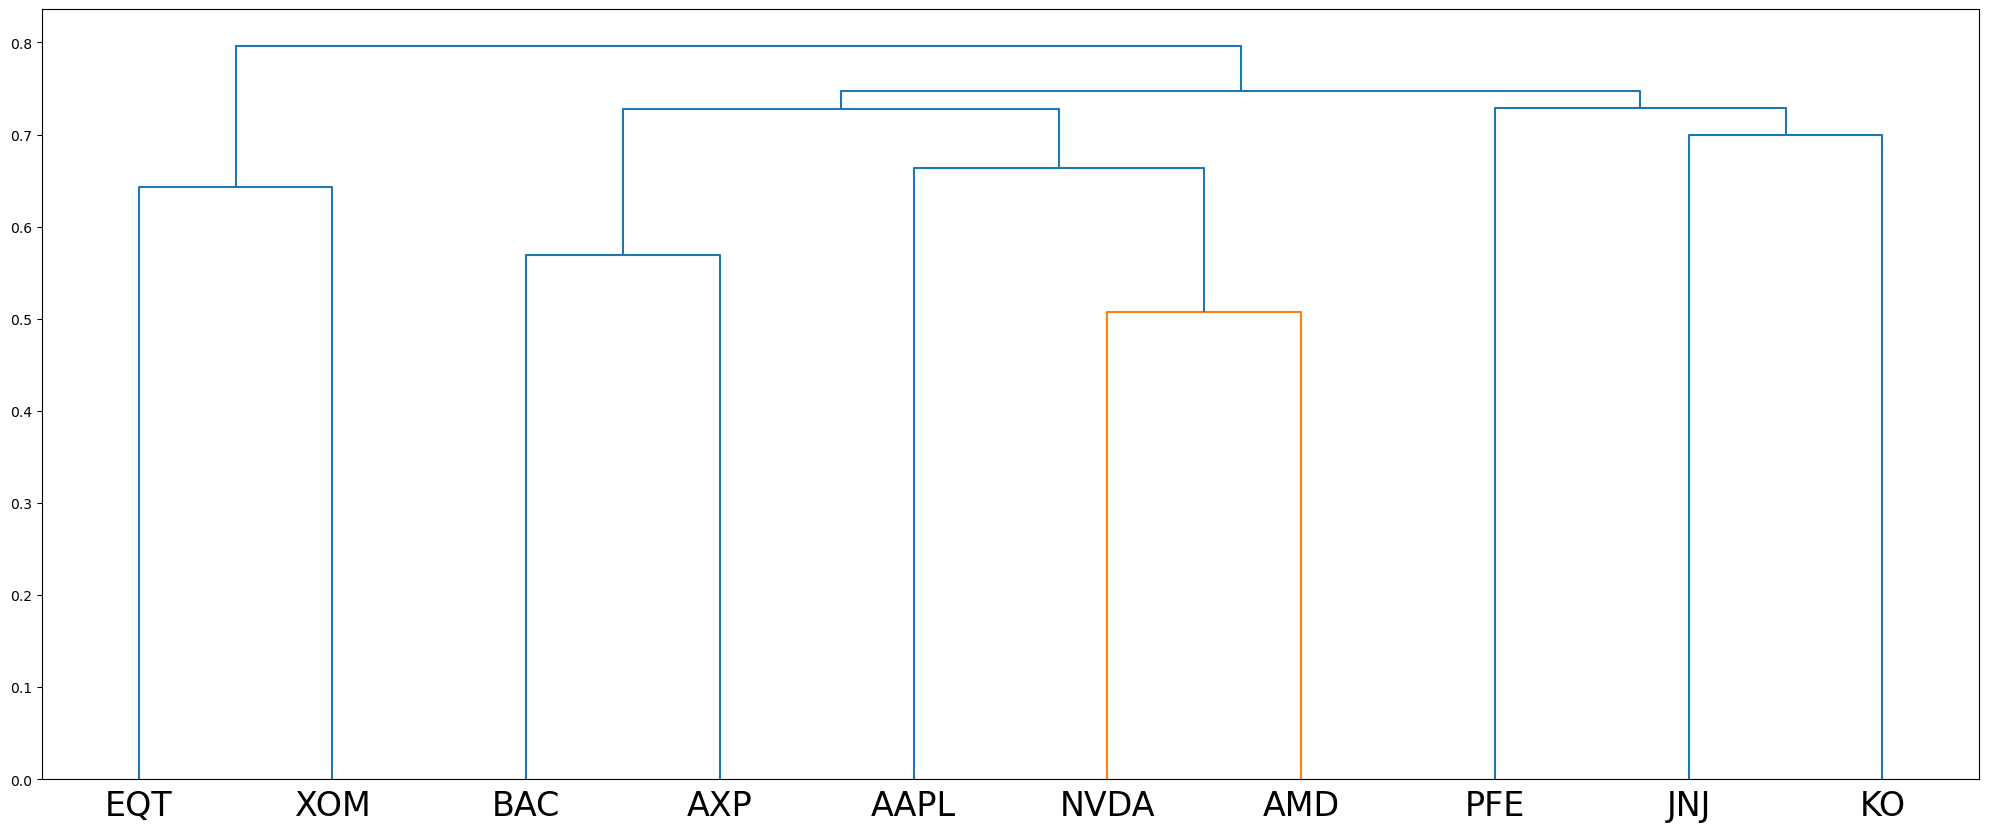

In [14]:
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(hrp.linkage_matrix, labels=x.columns, leaf_font_size=24)
plt.show()

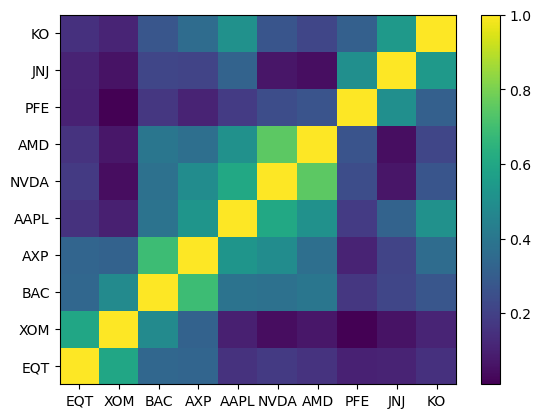

In [19]:
plt.pcolor(hrp.corr_matrix[:, hrp.sorted_elems][hrp.sorted_elems, :])
plt.colorbar()
plt.yticks(np.arange(.5,hrp.corr_matrix.shape[0]+.5),x.columns[hrp.sorted_elems], fontsize=10)
plt.xticks(np.arange(.5,hrp.corr_matrix.shape[0]+.5),x.columns[hrp.sorted_elems], fontsize=10)
plt.show()

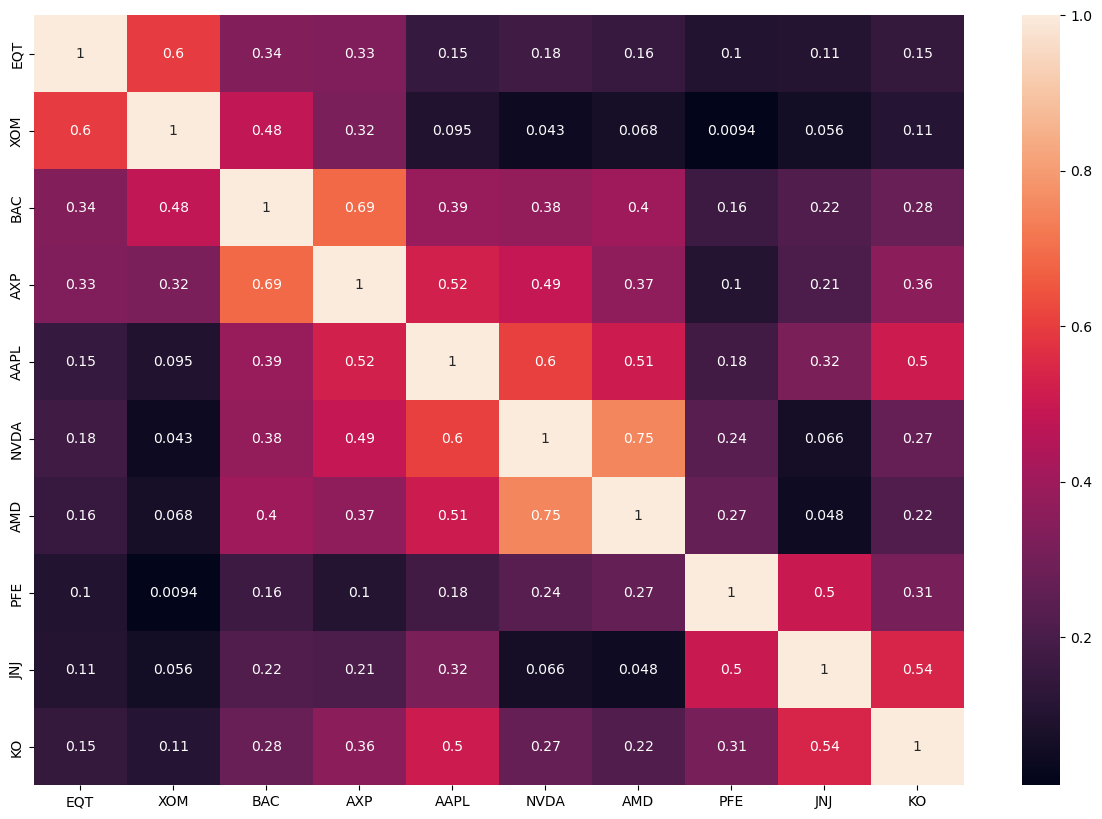

In [16]:
fig = plt.figure(figsize=(15, 10))
sns.heatmap(hrp.corr_matrix[:, hrp.sorted_elems][hrp.sorted_elems, :], annot=True)
plt.yticks(np.arange(.5,hrp.corr_matrix.shape[0]+.5),x.columns[hrp.sorted_elems])
plt.xticks(np.arange(.5,hrp.corr_matrix.shape[0]+.5),x.columns[hrp.sorted_elems])
plt.show()